# Distance, Velocity and Acceleration

### Acceleration events

This Jupyter notebook shows the effects of acceleration on the position of an object. If you were driving a car, you can accelerate by stepping on the gas pedal and deccelerate by stepping on the brakes. You can change the values in the cell below to create a sequence of accelerations, with a corresponding sequence of durations for these accelerations.

In [2]:
accels = [ 0.5, -0.5, 0, -1, 1, 0 ]
durations = [ 15, 15, 20, 10, 10, 20 ]

### Graphs

Running the cell below will generate a graph of both the position of your accelerating/deccelerating object and its corresponding velocity.

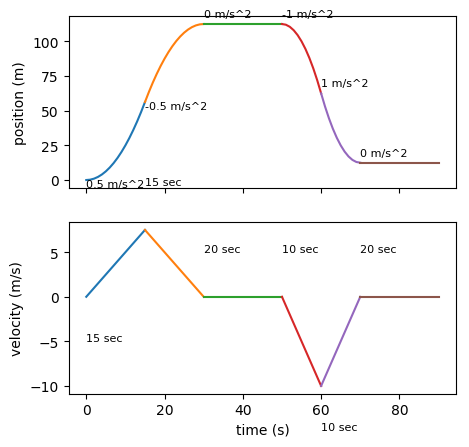

In [38]:
last_v = 0
last_d = 0
last_time = 0

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(2, sharex=True)
f.set_dpi(100)
f.set_figwidth(5)
f.set_figheight(5)

ax1.set_ylabel("position (m)")
ax2.set_ylabel("velocity (m/s)")
ax2.set_xlabel("time (s)")

timesteps = np.array([])
positions = np.array([])
velocities = np.array([])

for i in range(len(accels)):
    slice = np.linspace(0, durations[i], durations[i] + 1)
    ys = 0.5 * accels[i] * np.square(slice) + last_v * slice + last_d
    vs = accels[i] * slice + last_v
    ts = slice + last_time
    last_v = vs[len(vs) - 1]
    last_d = ys[len(ys) - 1]
    last_time = sum(durations[:i + 1])
    timesteps = np.append(timesteps, ts)
    positions = np.append(positions, ys)
    velocities = np.append(velocities, vs)
    if (ys[0] < ys[len(ys) - 1]):
        ypos = ys[0] - 5
    else:
        ypos = ys[0] + 5
    ax1.text(ts[0], ypos, str(accels[i]) + " m/s^2", fontsize=8)
    if (vs[0] < vs[len(vs) - 1]):
        ypos = vs[0] - 1
    else:
        ypos = vs[0] + 1
    ax2.text(ts[0], ypos, str(durations[i]) + " sec", fontsize=8)
    ax1.plot(ts, ys)
    ax2.plot(ts, vs)

plt.show()
